In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from radar import *

plt.style.use('ggplot')
%matplotlib inline

In [2]:
TOP50 = pd.read_csv('../../Paper/TOP50_Events/TOP50_events_Charlotte.csv', parse_dates=[0,1])

In [3]:
c = Radar('charlotte', TOP50.t_begin[0], how='hdf5', store='TOP50.h5', fname='storm_{yyyy}_{mm:02d}_{dd:02d}')

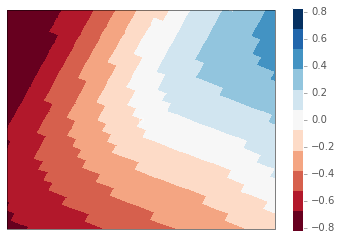

In [11]:
scat, ax = centralized_difference(c, '2006-08-30 19:00', '2006-08-31 02:00', cmap = plt.cm.get_cmap('RdBu', 11))
plt.colorbar(scat, ax=ax)

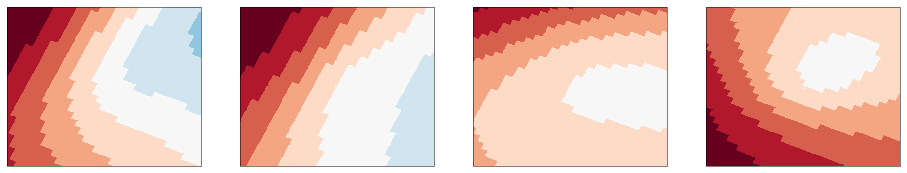

In [18]:
fig = plt.figure(figsize=(16,4))
axes = []
for n in range(0,4):
    c = Radar('charlotte', TOP50.t_begin[n], how='hdf5', store='TOP50.h5', fname='storm_{yyyy}_{mm:02d}_{dd:02d}')
    scat, ax = centralized_difference(c, nrows=1, ncols=4, n=n+1, cmap = plt.cm.get_cmap('RdBu', 11))

In [15]:
def centralized_difference(self, t_start=None, t_end=None, radius=15, buffer=20, save=False, **kwargs):
    l =[]
    if radius+3 < buffer:
        r=radius+3
    else:
        r=buffer
    ixy0 = buffer
    ixyn = self.lat.shape[1]-buffer
    try:
        it0 = self.time.get_loc(t_start)
        itn = self.time.get_loc(t_end)
    except:
        it0 = 0
        itn = self.time.shape[0]-2
    for ix in range(ixy0, ixyn):
        for iy in range(ixy0, ixyn):
            for it in range(it0, itn):
                if self.box[it, iy, ix] > 0:
                    l.append((self.box[it+1, iy-r:iy+r+1, ix-r:ix+r+1]-self.box[it, iy, ix]))

    test = np.mean(np.array(l), axis=0)
    if 'vmin' not in kwargs.keys():
        peak = max(np.abs(np.min(test[r-radius:radius+r, r-radius:radius+r])), 
                   np.max(test[r-radius:radius+r, r-radius:radius+r]))
        kwargs.update(dict(vmin = -peak, vmax = peak))
    if 'nrows' in kwargs.keys():
        nrows = kwargs.pop('nrows')
        ncols = kwargs.pop('ncols')
        n = kwargs.pop('n')
    else:
        nrows = ncols = n = 1
    ax = plt.subplot(nrows, ncols, n, projection=ccrs.PlateCarree())

    scat = ax.pcolor(self.lon[iy-r:iy+r+1, ix-r:ix+r+1], self.lat[iy-r:iy+r+1, ix-r:ix+r+1], test, **kwargs)
    ax.set_extent([self.lon[iy, ix-radius], self.lon[iy, ix+radius], self.lat[iy-radius, ix], self.lat[iy+radius, ix]])
    ax.scatter(self.lon[iy, ix], self.lat[iy, ix], edgecolor='white', facecolor='None')
    return(scat, ax)